# 例2. 使用线性回归拟合房价
- 使用sklearn自带的波士顿房价数据训练模型
- 思考如何优化模型


## 1. 加载数据
- 使用波士顿房价数据，收集于1993年前，包含房子的各种信息及房价信息
- 'CRIM',城镇犯罪率
- 'ZN'城镇超过25000平方英尺住宅比例, 
- 'INDUS'，城镇非零售用地比例, -
- 'CHAS'，是否靠近河边,
- 'NOX',一氧化氮浓度，
- 'RM',平均房间个数， 
- 'AGE',房屋年龄 ， 
- 'DIS',与市中心的比例， 
- 'RAD',周边高速公路的便利性指数， 
- 'TAX'，财产税率， 
- 'PTRATIO'，小学老师比例, 
- 'B',城镇黑人比例， 
- 'LSTAT'，地位较低人口的比例

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [33]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target
X.shape

(20640, 8)

In [34]:
X[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

## 2.构建模型，训练数据
- 划分训练集和测试集
- 使用线性回归拟合数据，并且评价模型

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [37]:
 
from sklearn.linear_model import LinearRegression

model = LinearRegression()

 
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score', cv_score)
print('cv_score', cv_score)


train_score 0.5910064719662453
cv_score 0.5910064719662453


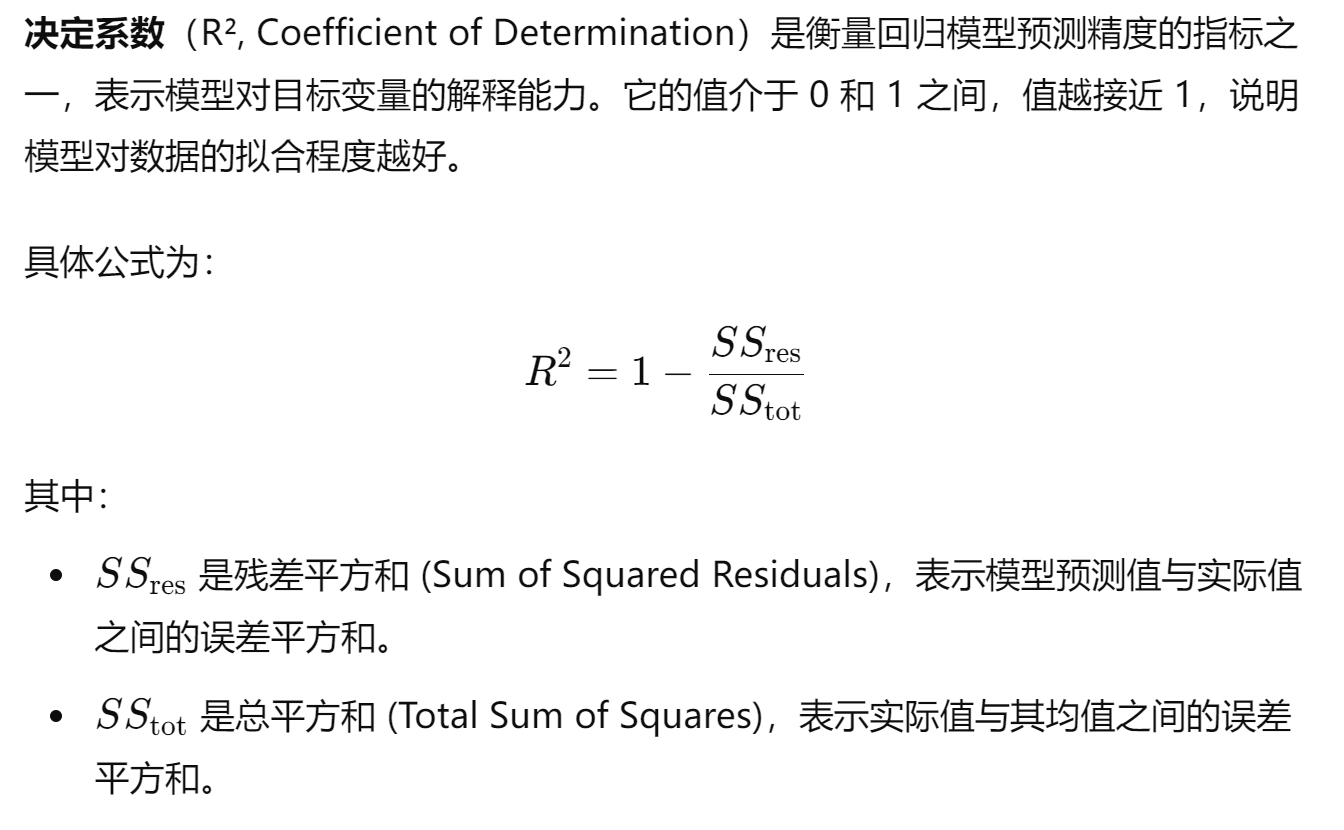

#### 针对训练集的评分比较低，低于测试集，在训练集拟合成本高，是欠拟合，需要增加训练特征，使用多项式

## 3.优化模型
- 归一化
- 使用多阶多项式：2阶

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # 将 StandardScaler 加入到流水线中进行标准化处理
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("scaler", StandardScaler()),  # 数据归一化处理
        ("linear_regression", LinearRegression())  # 去除 normalize 参数
    ])
    
    return pipeline

model = polynomial_model(degree=2)

 
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('train_score', cv_score)
print('cv_score', cv_score)

train_score 0.6550936972332364
cv_score 0.6550936972332364


## 5.优化模型
- 尝试不同阶多项式，用多阶多项式：1,2,3阶

<Figure size 1800x400 with 0 Axes>

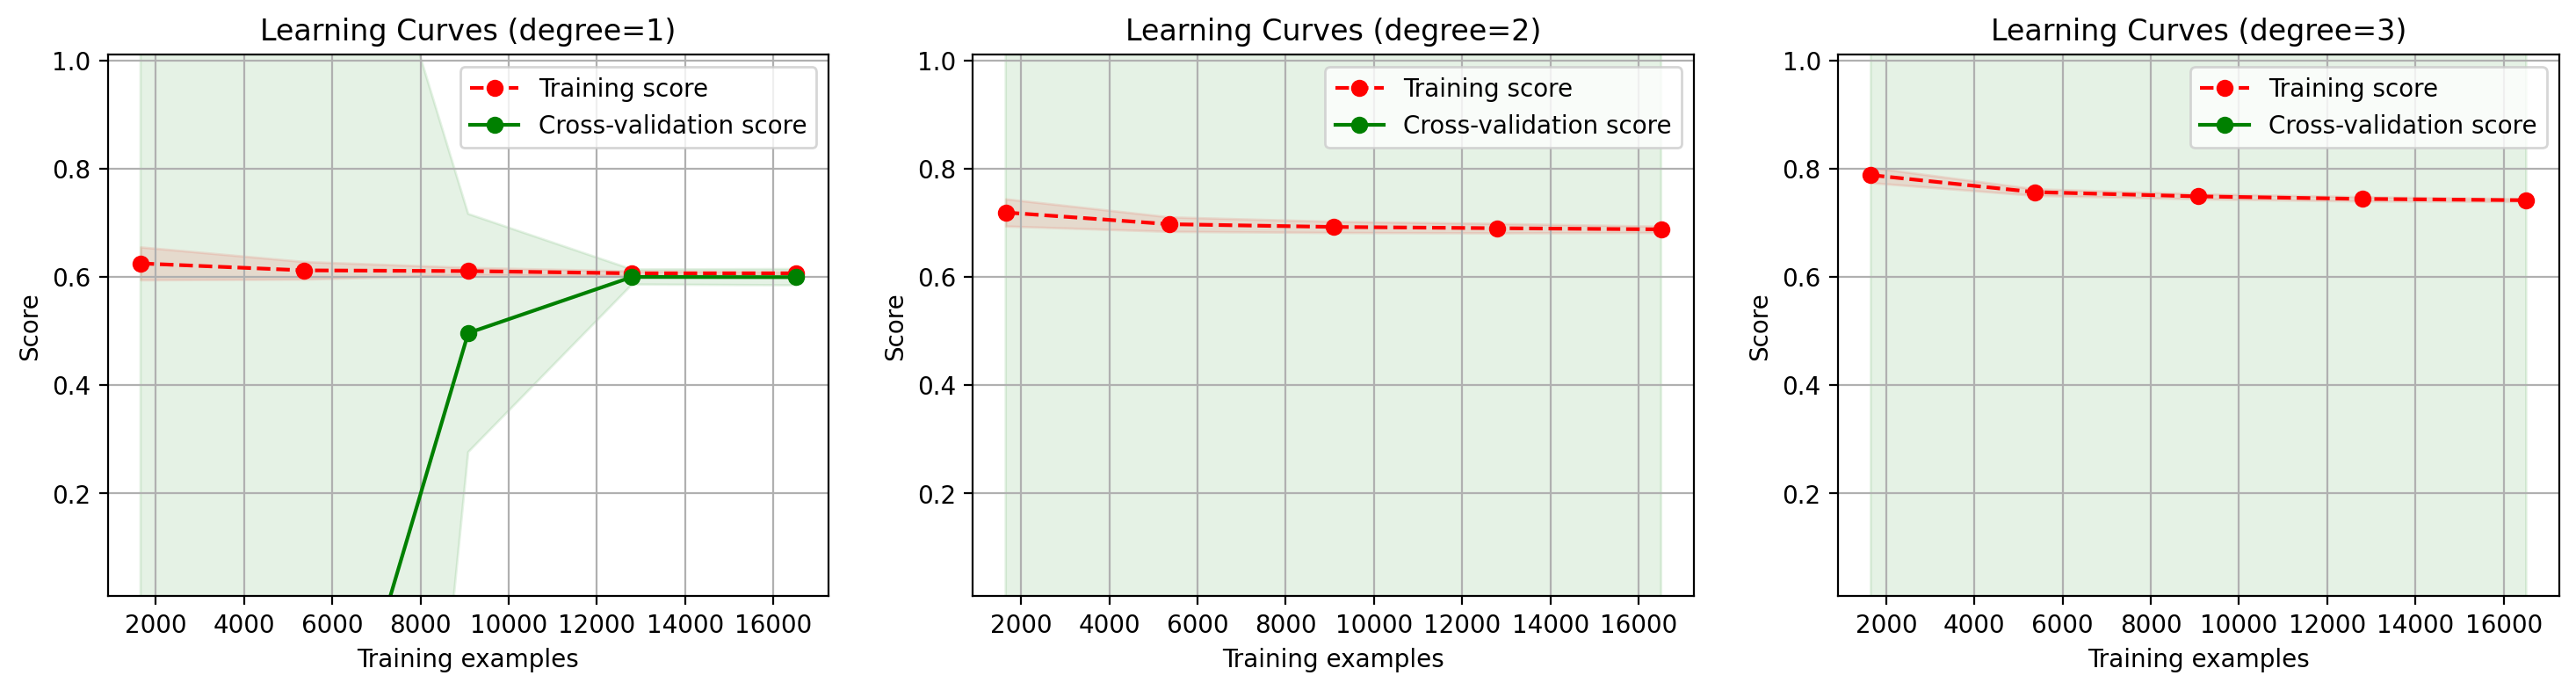

In [18]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4))
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3]

 
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)

